In [1035]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

In [1036]:
# loading the dataset
df = pd.read_csv('Datasets/Tweets.csv')

In [1037]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [1038]:
# Let's check the target value 
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [1039]:
# Drop the columns 
df = df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

In [1040]:
df.head(20)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [1041]:
# Removing the special characters, numbers and symbols
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

In [1042]:
df.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [1043]:
# Normalizing the text
df['text'] = df['text'].apply(lambda x: x.lower())

In [1044]:
df.head(10)

,airline_sentiment,text
0,neutral,@virginamerica what @dhepburn said.
1,positive,@virginamerica plus you've added commercials t...
2,neutral,@virginamerica i didn't today... must mean i n...
3,negative,@virginamerica it's really aggressive to blast...
4,negative,@virginamerica and it's a really big bad thing...
5,negative,@virginamerica seriously would pay $30 a fligh...
6,positive,"@virginamerica yes, nearly every time i fly vx..."
7,neutral,@virginamerica really missed a prime opportuni...
8,positive,"@virginamerica well, i didn't…but now i do! :-d"
9,positive,"@virginamerica it was amazing, and arrived an ..."


In [1045]:
# Removing the Tags from text
df['text'] = df['text'].apply(lambda x: re.sub(r'@[A-Za-z0-9_]+','', x))

In [1046]:
df.head(10)

,airline_sentiment,text
0,neutral,what said.
1,positive,plus you've added commercials to the experien...
2,neutral,i didn't today... must mean i need to take an...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $30 a flight for seats th...
6,positive,"yes, nearly every time i fly vx this “ear wor..."
7,neutral,really missed a prime opportunity for men wit...
8,positive,"well, i didn't…but now i do! :-d"
9,positive,"it was amazing, and arrived an hour early. yo..."


In [1047]:
# Removing the URLS from text
df['text'] = df['text'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','', x))

In [1048]:
df.head(10)

,airline_sentiment,text
0,neutral,what said.
1,positive,plus you've added commercials to the experien...
2,neutral,i didn't today... must mean i need to take an...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $30 a flight for seats th...
6,positive,"yes, nearly every time i fly vx this “ear wor..."
7,neutral,really missed a prime opportunity for men wit...
8,positive,"well, i didn't…but now i do! :-d"
9,positive,"it was amazing, and arrived an hour early. yo..."


In [1049]:
# Removing the Special Characters, Emojis, and Punctuation
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]','', x))


In [1050]:
df.head(10)

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experienc...
2,neutral,i didnt today must mean i need to take anothe...
3,negative,its really aggressive to blast obnoxious ente...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay 30 a flight for seats tha...
6,positive,yes nearly every time i fly vx this ear worm ...
7,neutral,really missed a prime opportunity for men wit...
8,positive,well i didntbut now i do d
9,positive,it was amazing and arrived an hour early your...


In [1051]:
# Removing the numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'[0-9]+', '', x))

In [1052]:
df.head(10)

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experienc...
2,neutral,i didnt today must mean i need to take anothe...
3,negative,its really aggressive to blast obnoxious ente...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that ...
6,positive,yes nearly every time i fly vx this ear worm ...
7,neutral,really missed a prime opportunity for men wit...
8,positive,well i didntbut now i do d
9,positive,it was amazing and arrived an hour early your...


In [1053]:
# check the null values
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [1054]:
df['airline_sentiment'].value_counts()   

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [1055]:
X = df['text']  
y = df['airline_sentiment']

In [1056]:
vectorizer = CountVectorizer()

# create X/y -split
X = vectorizer.fit_transform(X)

In [1057]:
# Create a RandomUnderSampler object
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
X, y = rus.fit_resample(X, y)

In [1058]:
y.value_counts()

airline_sentiment
neutral     3099
negative    2363
positive    2363
Name: count, dtype: int64

In [1059]:
 # train/test -split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1060]:
model = MultinomialNB()

In [1061]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 5.0],
    'fit_prior': [True, False],
}


# Configure and run grid search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',   
    cv=5,                 
    n_jobs=-1,            
    verbose=1             
)
grid_search.fit(X_train, y_train)
# Best parameters and best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'alpha': 0.5, 'fit_prior': True}


In [1062]:
model = MultinomialNB(alpha=0.75, fit_prior=True)      

model.fit(X_train, y_train)

MultinomialNB(alpha=0.75)

In [1063]:
 # test predictions for metrics later
predictions = model.predict(X_test)

In [1064]:
# accuracies etc.
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.70      0.80      0.74       479
     neutral       0.74      0.68      0.71       598
    positive       0.76      0.72      0.74       488

    accuracy                           0.73      1565
   macro avg       0.73      0.73      0.73      1565
weighted avg       0.73      0.73      0.73      1565



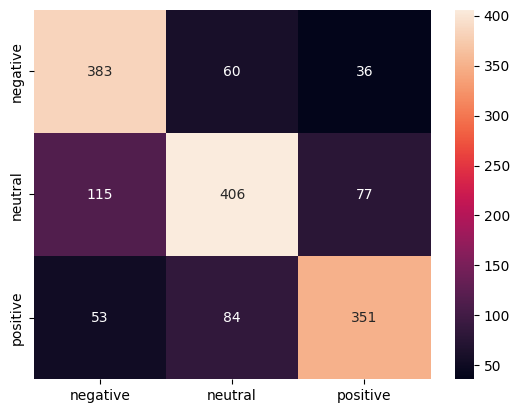

In [1065]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.show()

In [1066]:
 # switch to decimal format
np.set_printoptions(precision=8, suppress=True)

In [ ]:
sample_messages = [' seriously would pay  a flight for seats that didnt have this playing its really the only bad thing about flying va']

# vectorize the new messages and predict the values
processed_text = vectorizer.transform(sample_messages)
results = model.predict_proba(processed_text)

In [1070]:
print('Results:')
print()

# Define labels using the classes from the model
labels = model.classes_

# amount of the test messages above
amount = len(results)

# loop through each message
for index in range(amount):
    
    row = results[index]
    result = np.argmax(row)
    result_text = labels[result]

    print()
    print(sample_messages[index])
    print(row.astype(float))
    print(result_text)
    print()

Results:


 seriously would pay  a flight for seats that didnt have this playing its really the only bad thing about flying va
[0.77552261 0.22059014 0.00388725]
negative

